In [16]:
import sys
import os
import pandas as pd 
import scanpy as sc
import seaborn as sns

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [17]:
# read in the data relevant for this figure
def get_sc_data():
    fname = '../processing/talon/sc_talon_abundance_filtered.tsv'
    df = pd.read_csv(fname, sep='\t')    
    df['experiment'] = 'bulk'
    return df

def get_bulk_data():
    fname = '../processing/talon/bulk_talon_abundance_filtered.tsv'
    df = pd.read_csv(fname, sep='\t')
    
    # remove SIRVs and ERCCs
    df = df.loc[~df.annot_gene_id.str.contains('SIRV')]
    df = df.loc[~df.annot_gene_id.str.contains('ERCC')]
    
    df['experiment'] = 'sc'
    return df

def get_sc_adata():
    fname = '../processing/scanpy/sc_gene.h5ad'
    adata = sc.read(fname)
    
    return adata

### Panel 2A

In [3]:
opref = 'figures/bulk_vs_sc'
bulk = get_bulk_data()
sc = get_sc_data()
gtf = '/Users/fairliereese/Documents/programming/mortazavi_lab/ref/gencode.vM21/gencode.vM21.annotation.gtf'

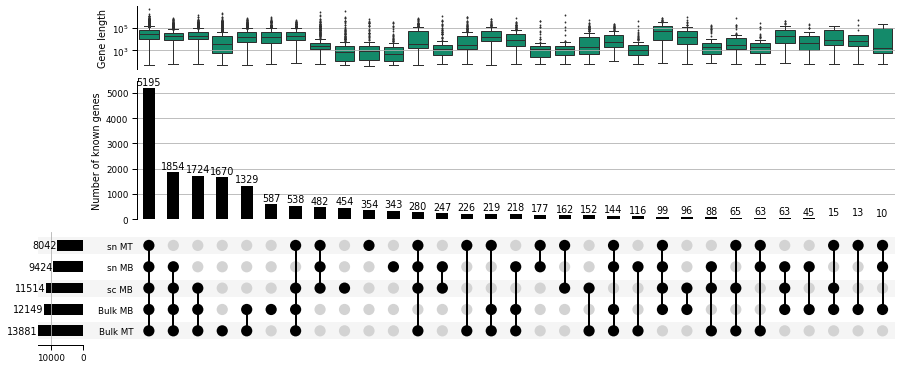

In [4]:
_, _ = plot_upset_plot(bulk, sc, opref, gtf, kind='gene', novelty='Known')

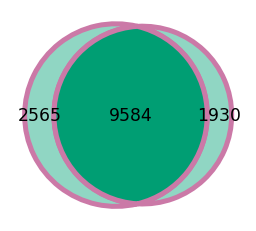

In [5]:
plot_detection_venn(bulk, sc, opref, gene_nov='Known', \
                    sample='MB', cell_part='cell')

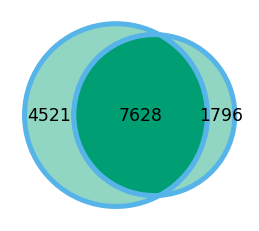

In [6]:
plot_detection_venn(bulk, sc, opref, gene_nov='Known', \
                    sample='MB', cell_part='nucleus')

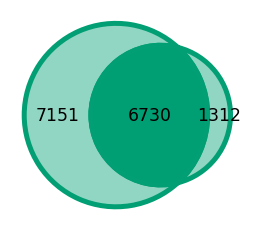

In [7]:
plot_detection_venn(bulk, sc, opref, gene_nov='Known', \
                    sample='MT', cell_part='nucleus')

### Panel 2B

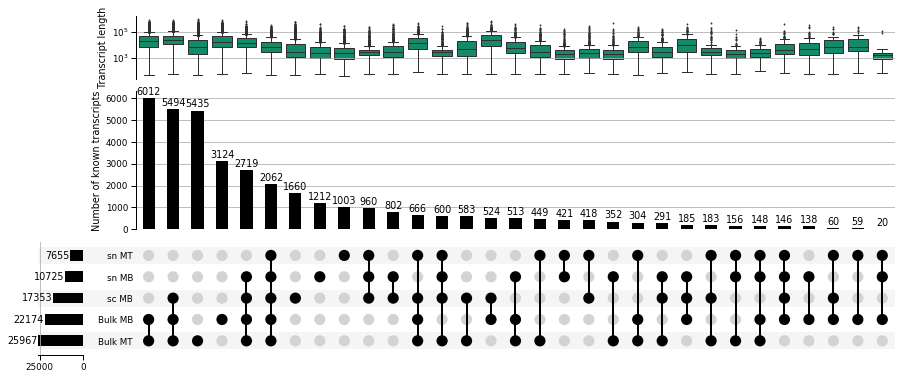

In [9]:
_, _ = plot_upset_plot(bulk, sc, opref, gtf, kind='transcript', novelty='Known')

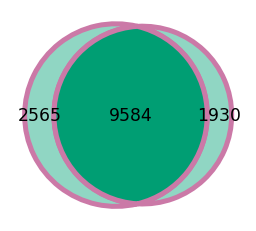

In [10]:
plot_detection_venn(bulk, sc, opref, transcript_nov='Known', \
                    sample='MB', cell_part='cell')

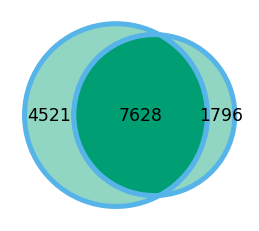

In [11]:
plot_detection_venn(bulk, sc, opref, transcript_nov='Known', \
                    sample='MB', cell_part='nucleus')

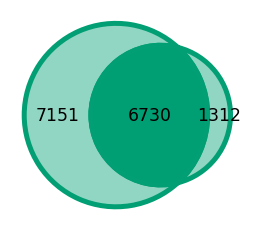

In [12]:
plot_detection_venn(bulk, sc, opref, transcript_nov='Known', \
                    sample='MT', cell_part='nucleus')

### Panel 2D

In [24]:
adata = get_sc_adata()
opref = 'figures/gene'
sns.set_context('paper', font_scale=2)    

Transforming to str index.


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


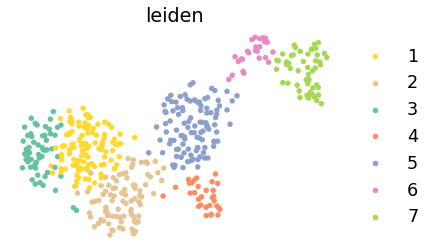

In [25]:
sc.pl.umap(adata, color='leiden', frameon=False, size=120, show=False)
plt.savefig('{}_umap_leiden.pdf'.format(opref), dpi=300, bbox_inches='tight')

### Panel 2E

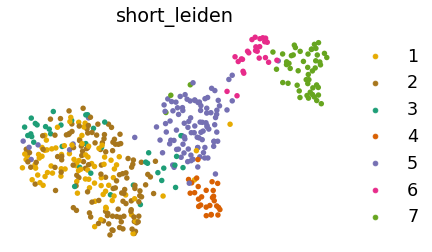

In [27]:
# visualize the UMAP by different variables
sc.pl.umap(adata, color='short_leiden', frameon=False, size=120, show=False)
plt.savefig('{}_umap_short_leiden.pdf'.format(opref), dpi=300, bbox_inches='tight')

### Panel 2F

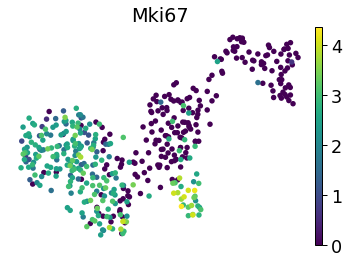

<Figure size 432x288 with 0 Axes>

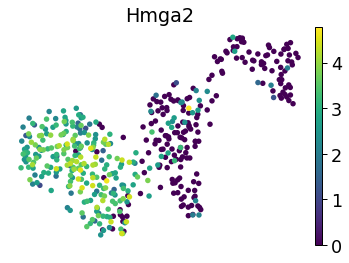

<Figure size 432x288 with 0 Axes>

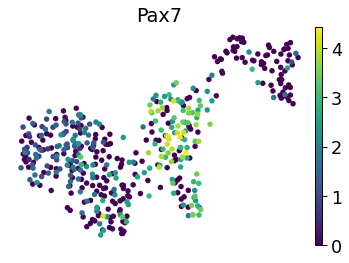

<Figure size 432x288 with 0 Axes>

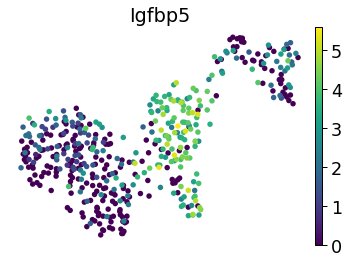

<Figure size 432x288 with 0 Axes>

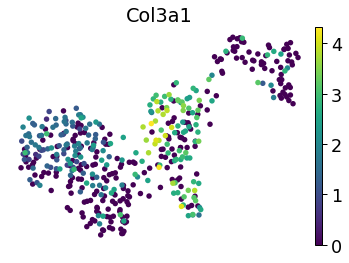

<Figure size 432x288 with 0 Axes>

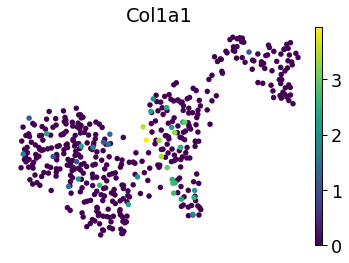

<Figure size 432x288 with 0 Axes>

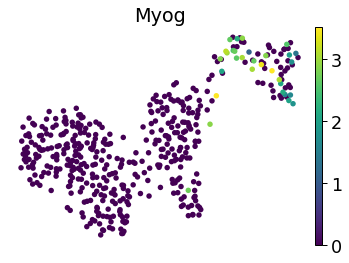

<Figure size 432x288 with 0 Axes>

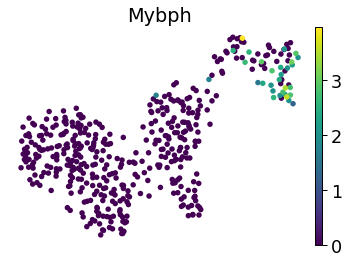

<Figure size 432x288 with 0 Axes>

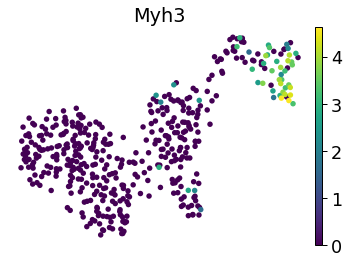

<Figure size 432x288 with 0 Axes>

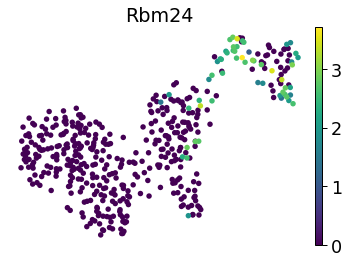

<Figure size 432x288 with 0 Axes>

In [31]:
genes = ['Mki67', 'Hmga2', 'Pax7', 'Igfbp5',
         'Col3a1', 'Col1a1', 'Myog', 'Mybph', 
         'Myh3', 'Rbm24']
for g in genes:
    sc.pl.umap(adata, color=g, frameon=False, size=120)
    plt.savefig('{}_umap_{}.pdf'.format(opref, g), dpi=300, bbox_inches='tight')